In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #needed for creating a model 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [6]:
raw_data = pd.read_csv('Insights.csv')
raw_data.head()

,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,Std Unit,Std Unit Price(USD),Qty,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR
0,31-Jan-20,42022110,LADIES LEATHER HAND BAG 100% COW LEATHER SAC C...,Leather,JNPT,France,Le Havre,1543.70,86.0,NOS,17.95,86.0,PCS,1543.7,17.95,USD,107981.82,Sea,0.0
1,31-Jan-20,42022110,BAG,Leather,JNPT,Japan,Kobe,3074.75,710.0,NOS,4.33,710.0,PCS,3074.3,4.33,USD,215078.96,Sea,0.0
2,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2167,Leather,JNPT,Spain,Algeciras,2487.49,100.0,NOS,24.87,100.0,PCS,2365.0,23.65,EUR,174000.00,Sea,0.0
3,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2213,Leather,JNPT,Spain,Algeciras,1529.66,100.0,NOS,15.30,100.0,PCS,1450.0,14.50,EUR,107000.00,Sea,0.0
4,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.1132,Leather,JNPT,Spain,Algeciras,2558.97,70.0,NOS,36.56,70.0,PCS,2436.0,34.80,EUR,179000.00,Sea,0.0


In [7]:
data = raw_data.copy()
df_filtered = data[data['Port of Destination'] == "Hamburg"] 
Qty = df_filtered['Qty']
df_filtered=df_filtered.drop(['Date','HS Code','Specific Product','Port of Destination','Port of Origin', 'Country of Destination','Std Qty', 'Std Unit','Qty', 'Unit', 'Invoice Value INR'],axis=1)
df_filtered.insert(len(df_filtered.columns),"Qty", Qty, True) 
df_filtered

,Product,Value(USD),Std Unit Price(USD),Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Qty
36,HAND BAGS OF LEATHER FOR LADIES,4801.88,16.01,4875.00,16.25,USD,335891.21,Sea,300.0
44,100% LEATHER HAND BAGS - LEANE LEATHER H AND BAGS,6107.00,12.21,6200.00,12.40,USD,427184.65,Sea,500.0
55,100% LEATHER BAGS - FAUNA LEATHER HAND B AGS,5663.75,11.33,5750.00,11.50,USD,396179.32,Sea,500.0
56,COW LEATHER GOODS- HAND BAG,44353.32,23.97,44344.50,23.97,USD,3102514.43,Sea,1850.0
57,COW LEATHER GOODS- HAND BAG,1401.00,28.02,1275.00,25.50,EUR,98000.00,Sea,50.0
...,...,...,...,...,...,...,...,...,...
4932,100% COTTON FABRIC EMBROIDED HANDBAG 100 % Cot...,472.50,1.05,472.50,1.05,USD,33358.47,Sea,450.0
4936,100% COTTON VELVET FABRIC PRINTED HANDB AG 100...,162.00,1.35,162.00,1.35,USD,11437.18,Sea,120.0
4937,100% COTTON FABRIC EMBROIDED HANDBAG 100 % Cot...,640.32,1.38,640.32,1.38,USD,45206.59,Sea,464.0
4940,100% COTTON FABRIC EMBROIDED HANDBAG 100 % Cot...,473.60,1.48,473.60,1.48,USD,33436.17,Sea,320.0


In [8]:
currency = df_filtered["Unit Rate Currency"].unique()
currency = currency.tolist()
df_filtered['Unit Rate Currency'] = df_filtered['Unit Rate Currency'].map(lambda x: currency.index(x))
df_filtered['Qty'] = df_filtered['Qty'].map(lambda x: 0 if x <100 else 1)
shipment = df_filtered["Shipment Mode"].unique()
shipment = shipment.tolist()
df_filtered['Shipment Mode'] = df_filtered['Shipment Mode'].map(lambda x: shipment.index(x))
prod = df_filtered["Product"].unique()
prod = prod.tolist()
df_filtered['Product'] = df_filtered['Product'].map(lambda x: prod.index(x))
df_filtered


,Product,Value(USD),Std Unit Price(USD),Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Qty
36,0,4801.88,16.01,4875.00,16.25,0,335891.21,0,1
44,1,6107.00,12.21,6200.00,12.40,0,427184.65,0,1
55,2,5663.75,11.33,5750.00,11.50,0,396179.32,0,1
56,3,44353.32,23.97,44344.50,23.97,0,3102514.43,0,1
57,3,1401.00,28.02,1275.00,25.50,1,98000.00,0,0
...,...,...,...,...,...,...,...,...,...
4932,416,472.50,1.05,472.50,1.05,0,33358.47,0,1
4936,417,162.00,1.35,162.00,1.35,0,11437.18,0,1
4937,418,640.32,1.38,640.32,1.38,0,45206.59,0,1
4940,419,473.60,1.48,473.60,1.48,0,33436.17,0,1


In [9]:
x1_column_name = df_filtered.columns.tolist()[0:len(df_filtered.columns)-1]
y= df_filtered['Qty']
x= df_filtered[x1_column_name]
# print(y.head())
# print("X HEAD************")
# print(x.head())
 # we dont need this in independant data , so dropping 
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=20) 
X_train.fillna(X_train.mean(),inplace=True) #this will replace all NAN values by their mean. 
Y_train.fillna(Y_train.mean(),inplace=True) #this will replace all NAN values by their mean.   
# print(X_train.shape) 
# print(X_test.shape) 
# print(Y_train.shape) 
# print(Y_test.shape) 
logis=LogisticRegression()

logis.fit(X_train,Y_train) 
predictions = logis.predict(X_test) 
print(classification_report(Y_test,predictions)) 
 
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.99      1.00      0.99        66

    accuracy                           0.99        98
   macro avg       0.99      0.98      0.99        98
weighted avg       0.99      0.99      0.99        98

0.9897959183673469


/Users/reubencoutinho/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/reubencoutinho/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
logis.score(X_train,Y_train)

0.9974293059125964

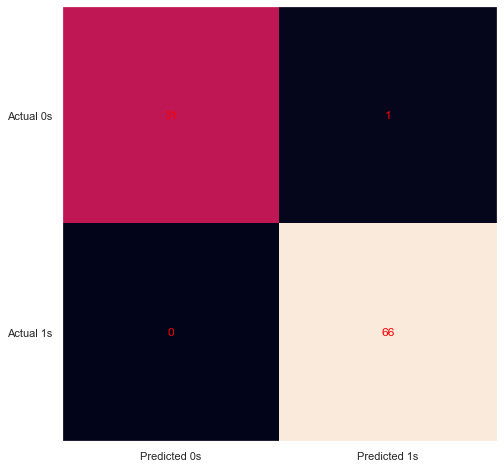

In [11]:

cm = confusion_matrix(Y_test,predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [12]:
test_data = {
    "Product":[0],
    "Value(USD)":[1400],
    "Std Unit Price(USD)":[25],
    "Value In FC":[1200],
    "Unit Rate In FC":[25],
    "Unit Rate Currency":[1],
    "Value(INR)":[95000],
    "Shipment Mode":[0]
}
test_dataset = pd.DataFrame(test_data)
test_dataset

,Product,Value(USD),Std Unit Price(USD),Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode
0,0,1400,25,1200,25,1,95000,0


In [13]:
predicted_proba = logis.predict(test_dataset)
predicted_proba

array([0])